In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import annotations
from typing import List
from dataclasses import dataclass

import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
def f_angle_360(a, origin):
    '''Return [0,360]'''
    rad = lambda a,origin: np.arctan2(a[1] - origin[1], a[0] - origin[0])
    return (rad(a,origin) * 180 / np.pi + 360)%360

@dataclass
class Customer(object):
    def __init__(self, dc:int, xc:float, yc:float, angle:float) -> None:
        self.demand = dc
        self.x = xc
        self.y = yc
        self.orientation = angle

def read_input(testcase_f_path:str):
    N:int; V:int; C:int
    customers:List[Customer]

    with open(testcase_f_path, 'r+', encoding='utf-8') as file_obj:
        lines = list(file_obj)

        N, V, C = lines[0].strip().split(' ')
        N, V, C = int(N), int(V), int(C)

        parts = lines[1].strip().split(' ')
        wh_x, wh_y = float(parts[1]), float(parts[2])

        customers = []
        for i, line in enumerate(lines[1:]):
            dc, x, y = line.strip().split(' ')
            customers.append( Customer(int(dc), float(x), float(y), f_angle_360(
                a=(float(x), float(y)),
                origin=(wh_x, wh_y))) )
    return N, V, C, customers

In [3]:
def plot_vrp(test_case):
    # Read data
    N, V, C, customers = read_input(f'data/{test_case}')

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    fig.suptitle(test_case, fontsize=24)

    # Plot statement
    axs[0].scatter(
        x=customers[0].x, y=customers[0].y,
        s=300, c='r',
        marker='*', label='warehouse')

    total_demand = sum(cus.demand for cus in customers[1:])
    for cus in customers[1:]:
        axs[0].scatter(
            x=cus.x, y=cus.y,
            s=1000.0*cus.demand/total_demand, c='k',
            marker='^', label='customer')
        if N < 30:
            axs[0].text(
                x=cus.x+0.1, y=cus.y+0.2,
                s=f"${cus.orientation:.2f}^o$",
                fontsize=12)

    # Plot solution
    def plot_segment(p1, p2, color='b', linewidth=0.75):
        axs[1].plot((p1[0], p2[0]), (p1[1], p2[1]), color=color, linestyle='dotted', linewidth=linewidth)

    with open(f'submission/out_{test_case}', 'r+') as file_obj:
        lines = list(file_obj)

        total_cost = float(lines[0].strip().split(' ')[0])
        axs[1].set_title(f'Total cost = {total_cost:.3f}', fontsize=16)

        cmap = cm.brg
        norm = Normalize(vmin=0, vmax=V+3)

        for i in range(1, len(lines)):
            route = list(map(int, lines[i].strip().split(' ')))
            if route == [0, 0]: continue

            for j in range(len(route) - 1):
                src = route[j]
                dest = route[j+1]

                if src != 0:
                    axs[1].scatter(
                        x=customers[src].x, y=customers[src].y,
                        s=1000.0*customers[src].demand/total_demand, color='k',
                        marker='^', label='customer')

                plot_segment(
                    (customers[src].x, customers[src].y),
                    (customers[dest].x, customers[dest].y), color=cmap(norm(i)))

    axs[1].scatter(
        x=customers[0].x, y=customers[0].y,
        s=300, c='r',
        marker='*', label='warehouse')

    plt.savefig(f'assets/{test_case}.png', dpi=300)
    plt.show()

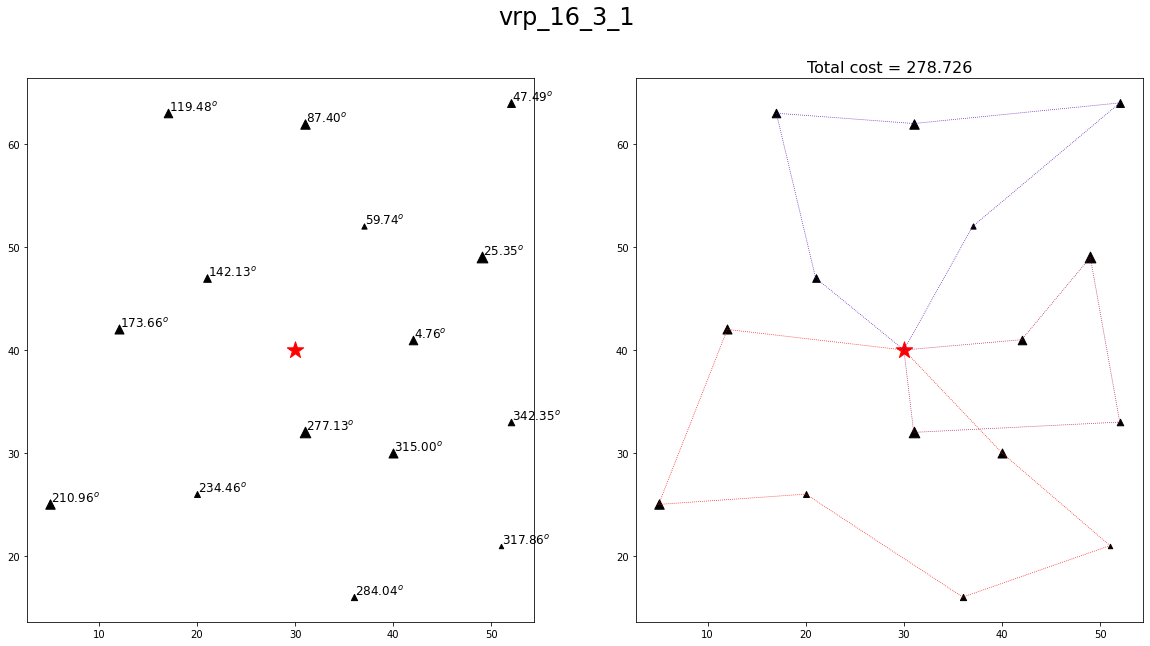

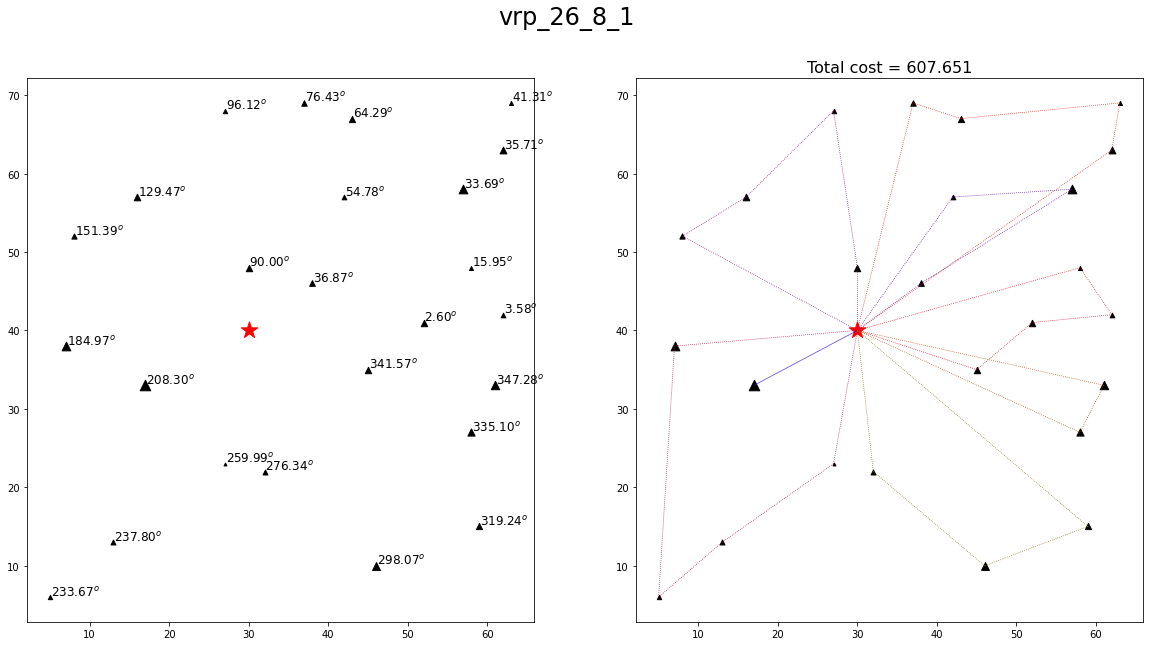

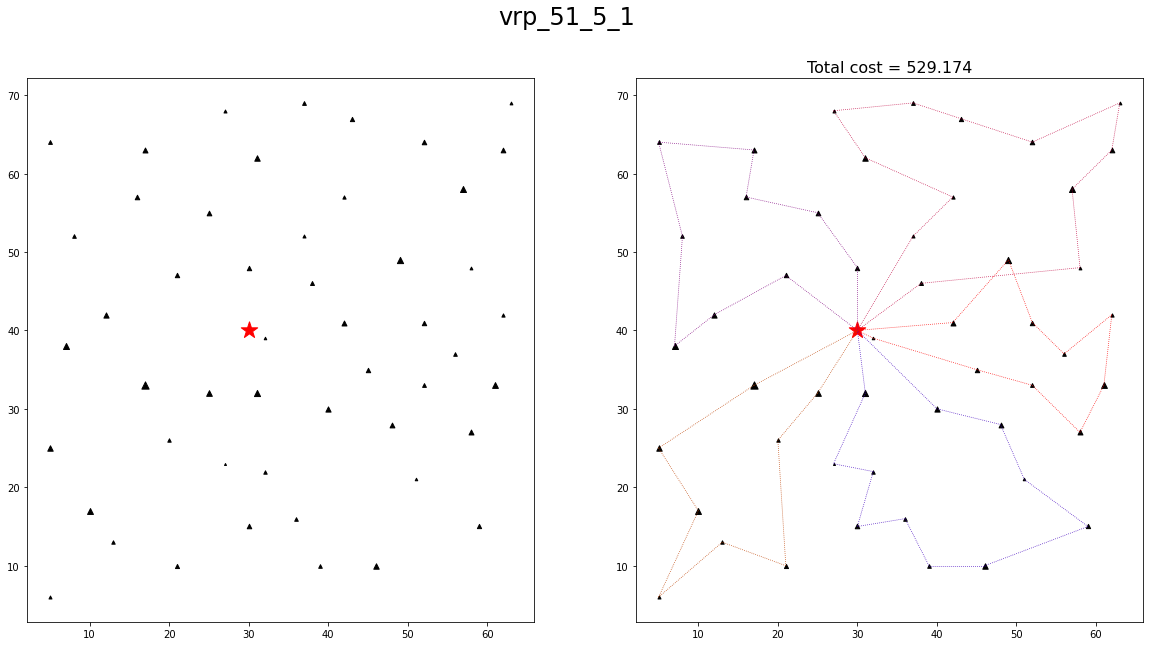

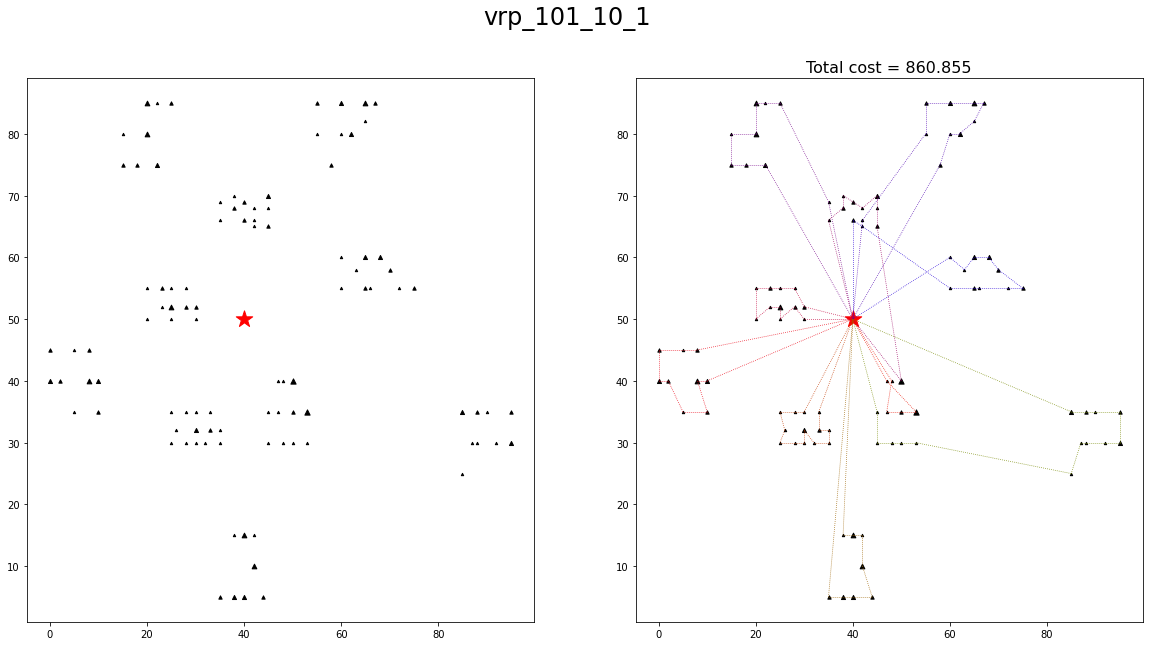

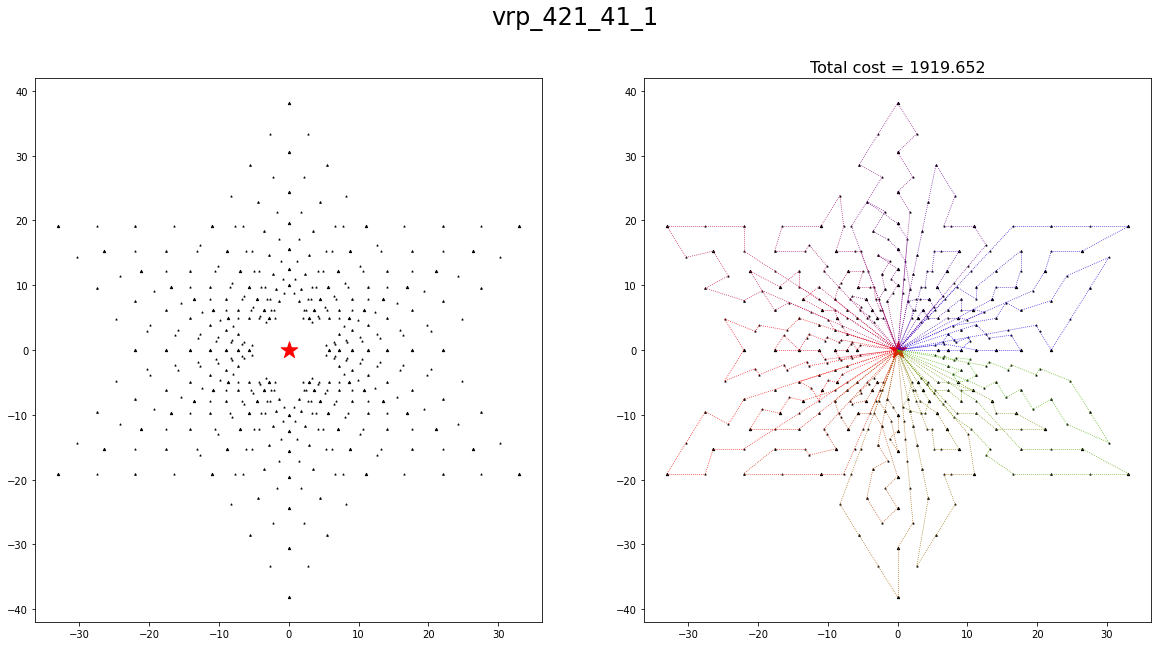

In [4]:
plot_vrp('vrp_16_3_1')
plot_vrp('vrp_26_8_1')
plot_vrp('vrp_51_5_1')
plot_vrp('vrp_101_10_1')
# plot_vrp('vrp_200_16_1')
plot_vrp('vrp_421_41_1')